In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file paths
#/content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/train.zip
#/content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/test.zip
#/content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/validation.zip


In [ ]:
#extracting the zip files


In [ ]:
import zipfile
import os

# List of zip files and their extraction paths
zip_files = [
    ("/content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/train.zip", "/content/train"),
    ("/content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/test.zip", "/content/test"),
    ("/content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/validation.zip", "/content/validation"),
]

# Extract each ZIP file
for zip_path, extract_path in zip_files:
    print(f"Processing: {zip_path}")

    # Ensure the extraction directory exists
    os.makedirs(extract_path, exist_ok=True)

    # Extract the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(f"Extracted to: {extract_path}\n")

Processing: /content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/train.zip
Extracted to: /content/train

Processing: /content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/test.zip
Extracted to: /content/test

Processing: /content/drive/MyDrive/ICTAK DATAS/vegetable vs fruits/validation.zip
Extracted to: /content/validation



#VERIFYING THE EXTRACTION

In [ ]:
!ls /content/test


 apple	        carrot		 garlic     lettuce   peas	    spinach
 banana         cauliflower	 ginger     mango     pineapple     sweetcorn
 beetroot      'chilli pepper'	 grapes     onion     pomegranate   sweetpotato
'bell pepper'   corn		 jalepeno   orange    potato	    tomato
 cabbage        cucumber	 kiwi	    paprika   raddish	    turnip
 capsicum       eggplant	 lemon	    pear     'soy beans'    watermelon


In [ ]:
!ls /content/train



 apple	        carrot		 garlic     lettuce   peas	    spinach
 banana         cauliflower	 ginger     mango     pineapple     sweetcorn
 beetroot      'chilli pepper'	 grapes     onion     pomegranate   sweetpotato
'bell pepper'   corn		 jalepeno   orange    potato	    tomato
 cabbage        cucumber	 kiwi	    paprika   raddish	    turnip
 capsicum       eggplant	 lemon	    pear     'soy beans'    watermelon


In [ ]:
!ls /content/validation

 apple	        carrot		 garlic     lettuce   peas	    spinach
 banana         cauliflower	 ginger     mango     pineapple     sweetcorn
 beetroot      'chilli pepper'	 grapes     onion     pomegranate   sweetpotato
'bell pepper'   corn		 jalepeno   orange    potato	    tomato
 cabbage        cucumber	 kiwi	    paprika   raddish	    turnip
 capsicum       eggplant	 lemon	    pear     'soy beans'    watermelon


#CLASSIFYING TEST DATA

In [32]:
import shutil

# Paths
test_dir = "/content/test"
structured_test_dir = "/content/structured_test"

# Define fruits and vegetables categories (normalized to lowercase and stripped spaces)
fruits = {fruit.lower().replace(" ", "") for fruit in [
    "Banana", "Apple", "Pear", "Grapes", "Orange", "Kiwi",
    "Watermelon", "Pomegranate", "Pineapple", "Mango"
]}
vegetables = {vegetable.lower().replace(" ", "") for vegetable in [
    "Cucumber", "Carrot", "Capsicum", "Onion", "Potato", "Lemon",
    "Tomato", "Raddish", "Beetroot", "Cabbage", "Lettuce", "Spinach",
    "Soy beans", "Cauliflower", "Bell Pepper", "Chilli pepper",
    "Turnip", "Corn", "Sweetcorn", "Sweet Potato", "Paprika",
    "Jalepeno", "Ginger", "Garlic", "Peas", "Eggplant"
]}

# Create destination folders
fruits_dir = os.path.join(structured_test_dir, "Fruits")
vegetables_dir = os.path.join(structured_test_dir, "Vegetables")
os.makedirs(fruits_dir, exist_ok=True)
os.makedirs(vegetables_dir, exist_ok=True)

# Function to classify and save data
def classify_and_save_test_data(test_dir, fruits_dir, vegetables_dir):
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)

        # Skip the structured_test directory and hidden files/folders
        if os.path.abspath(item_path) == os.path.abspath(structured_test_dir) or item.startswith("."):
            continue

        # Normalize the folder/file name
        normalized_name = item.lower().replace(" ", "")

        # If it's a directory, classify based on folder name
        if os.path.isdir(item_path):
            if normalized_name in fruits:
                dest = os.path.join(fruits_dir, item)
                shutil.copytree(item_path, dest, dirs_exist_ok=True)
                print(f"Copied folder '{item}' to Fruits.")
            elif normalized_name in vegetables:
                dest = os.path.join(vegetables_dir, item)
                shutil.copytree(item_path, dest, dirs_exist_ok=True)
                print(f"Copied folder '{item}' to Vegetables.")
            else:
                print(f"Skipping unclassified folder: {item}")

        # If it's a file, classify based on file name
        elif os.path.isfile(item_path):
            if any(fruit in normalized_name for fruit in fruits):
                shutil.copy(item_path, fruits_dir)
                print(f"Copied file '{item}' to Fruits.")
            elif any(vegetable in normalized_name for vegetable in vegetables):
                shutil.copy(item_path, vegetables_dir)
                print(f"Copied file '{item}' to Vegetables.")
            else:
                print(f"Skipping unclassified file: {item}")




Copied folder 'peas' to Vegetables.
Copied folder 'apple' to Fruits.
Copied folder 'watermelon' to Fruits.
Copied folder 'jalepeno' to Vegetables.
Copied folder 'onion' to Vegetables.
Copied folder 'pomegranate' to Fruits.
Copied folder 'paprika' to Vegetables.
Copied folder 'soy beans' to Vegetables.
Copied folder 'chilli pepper' to Vegetables.
Copied folder 'capsicum' to Vegetables.
Copied folder 'tomato' to Vegetables.
Copied folder 'orange' to Fruits.
Copied folder 'mango' to Fruits.
Copied folder 'cucumber' to Vegetables.
Copied folder 'grapes' to Fruits.
Copied folder 'lettuce' to Vegetables.
Copied folder 'sweetpotato' to Vegetables.
Copied folder 'pineapple' to Fruits.
Copied folder 'garlic' to Vegetables.
Copied folder 'carrot' to Vegetables.
Copied folder 'pear' to Fruits.
Copied folder 'ginger' to Vegetables.
Copied folder 'cabbage' to Vegetables.
Copied folder 'beetroot' to Vegetables.
Copied folder 'turnip' to Vegetables.
Copied folder 'lemon' to Vegetables.
Copied folder 

#CLASSIFYING TRAIN DATASET

In [68]:
# Paths
test_dir = "/content/train"
structured_test_dir = "/content/structured_train"

# Define fruits and vegetables categories (normalized to lowercase and stripped spaces)
fruits = {fruit.lower().replace(" ", "") for fruit in [
    "Banana", "Apple", "Pear", "Grapes", "Orange", "Kiwi",
    "Watermelon", "Pomegranate", "Pineapple", "Mango"
]}
vegetables = {vegetable.lower().replace(" ", "") for vegetable in [
    "Cucumber", "Carrot", "Capsicum", "Onion", "Potato", "Lemon",
    "Tomato", "Raddish", "Beetroot", "Cabbage", "Lettuce", "Spinach",
    "Soy beans", "Cauliflower", "Bell Pepper", "Chilli pepper",
    "Turnip", "Corn", "Sweetcorn", "Sweet Potato", "Paprika",
    "Jalepeno", "Ginger", "Garlic", "Peas", "Eggplant"
]}

# Create destination folders
fruits_dir = os.path.join(structured_test_dir, "Fruits")
vegetables_dir = os.path.join(structured_test_dir, "Vegetables")
os.makedirs(fruits_dir, exist_ok=True)
os.makedirs(vegetables_dir, exist_ok=True)

# Function to classify and save data
def classify_and_save_test_data(test_dir, fruits_dir, vegetables_dir):
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)

        # Skip the structured_test directory and hidden files/folders
        if os.path.abspath(item_path) == os.path.abspath(structured_test_dir) or item.startswith("."):
            continue

        # Normalize the folder/file name
        normalized_name = item.lower().replace(" ", "")

        # If it's a directory, classify based on folder name
        if os.path.isdir(item_path):
            if normalized_name in fruits:
                dest = os.path.join(fruits_dir, item)
                shutil.copytree(item_path, dest, dirs_exist_ok=True)
                print(f"Copied folder '{item}' to Fruits.")
            elif normalized_name in vegetables:
                dest = os.path.join(vegetables_dir, item)
                shutil.copytree(item_path, dest, dirs_exist_ok=True)
                print(f"Copied folder '{item}' to Vegetables.")
            else:
                print(f"Skipping unclassified folder: {item}")

        # If it's a file, classify based on file name
        elif os.path.isfile(item_path):
            if any(fruit in normalized_name for fruit in fruits):
                shutil.copy(item_path, fruits_dir)
                print(f"Copied file '{item}' to Fruits.")
            elif any(vegetable in normalized_name for vegetable in vegetables):
                shutil.copy(item_path, vegetables_dir)
                print(f"Copied file '{item}' to Vegetables.")
            else:
                print(f"Skipping unclassified file: {item}")



#CLASSIFYING THE VALIDATION DATA

In [67]:
# Paths
test_dir = "/content/validation"
structured_test_dir = "/content/structured_validation"

# Define fruits and vegetables categories (normalized to lowercase and stripped spaces)
fruits = {fruit.lower().replace(" ", "") for fruit in [
    "Banana", "Apple", "Pear", "Grapes", "Orange", "Kiwi",
    "Watermelon", "Pomegranate", "Pineapple", "Mango"
]}
vegetables = {vegetable.lower().replace(" ", "") for vegetable in [
    "Cucumber", "Carrot", "Capsicum", "Onion", "Potato", "Lemon",
    "Tomato", "Raddish", "Beetroot", "Cabbage", "Lettuce", "Spinach",
    "Soy beans", "Cauliflower", "Bell Pepper", "Chilli pepper",
    "Turnip", "Corn", "Sweetcorn", "Sweet Potato", "Paprika",
    "Jalepeno", "Ginger", "Garlic", "Peas", "Eggplant"
]}

# Create destination folders
fruits_dir = os.path.join(structured_test_dir, "Fruits")
vegetables_dir = os.path.join(structured_test_dir, "Vegetables")
os.makedirs(fruits_dir, exist_ok=True)
os.makedirs(vegetables_dir, exist_ok=True)

# Function to classify and save data
def classify_and_save_test_data(test_dir, fruits_dir, vegetables_dir):
    for item in os.listdir(test_dir):
        item_path = os.path.join(test_dir, item)

        # Skip the structured_test directory and hidden files/folders
        if os.path.abspath(item_path) == os.path.abspath(structured_test_dir) or item.startswith("."):
            continue

        # Normalize the folder/file name
        normalized_name = item.lower().replace(" ", "")

        # If it's a directory, classify based on folder name
        if os.path.isdir(item_path):
            if normalized_name in fruits:
                dest = os.path.join(fruits_dir, item)
                shutil.copytree(item_path, dest, dirs_exist_ok=True)
                print(f"Copied folder '{item}' to Fruits.")
            elif normalized_name in vegetables:
                dest = os.path.join(vegetables_dir, item)
                shutil.copytree(item_path, dest, dirs_exist_ok=True)
                print(f"Copied folder '{item}' to Vegetables.")
            else:
                print(f"Skipping unclassified folder: {item}")

        # If it's a file, classify based on file name
        elif os.path.isfile(item_path):
            if any(fruit in normalized_name for fruit in fruits):
                shutil.copy(item_path, fruits_dir)
                print(f"Copied file '{item}' to Fruits.")
            elif any(vegetable in normalized_name for vegetable in vegetables):
                shutil.copy(item_path, vegetables_dir)
                print(f"Copied file '{item}' to Vegetables.")
            else:
                print(f"Skipping unclassified file: {item}")



In [35]:
#verifying the shape of train and test data

#SPLITTING THE TRAIN DATASET

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the structured test data (fruits and vegetables)
structured_test_dir = "/content/structured_train"

# Initialize ImageDataGenerator for rescaling and augmentation (optional)
datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values to [0, 1]

# Load images from directories (assuming that folders "Fruits" and "Vegetables" already exist)
train_data = datagen.flow_from_directory(
    directory=structured_test_dir,  # Path to the directory where your classified test data is
    target_size=(224, 224),  # Resize the images to a fixed size (224x224 for CNN)
    batch_size=32,  # Number of images to process per batch
    class_mode='binary',  # For two classes (Fruits vs Vegetables), use 'binary'
    shuffle=True,
    color_mode='rgb',
    # Shuffle data
    seed=42
)

# Initialize empty lists to store all images and labels
all_images = []
all_labels = []

# Iterate over all batches and collect the images and labels
for images, labels in train_data:
    all_images.append(images)
    all_labels.append(labels)

    # If the number of samples in the current batch is less than batch_size, we break
    if len(all_images) * train_data.batch_size >= train_data.samples:
        break

# Convert lists to numpy arrays
x_train = np.concatenate(all_images, axis=0)
y_train = np.concatenate(all_labels, axis=0)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)



Found 3115 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


x_train shape: (3115, 224, 224, 3)
y_train shape: (3115,)


#SPLITTING THE TEST DATASET

In [57]:
structured_test_dir = "/content/structured_test"

# Initialize ImageDataGenerator for rescaling and augmentation (optional)
datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values to [0, 1]

# Load images from directories (assuming that folders "Fruits" and "Vegetables" already exist)
train_data = datagen.flow_from_directory(
    directory=structured_test_dir,  # Path to the directory where your classified test data is
    target_size=(224, 224),  # Resize the images to a fixed size (224x224 for CNN)
    batch_size=32,  # Number of images to process per batch
    class_mode='binary',  # For two classes (Fruits vs Vegetables), use 'binary'
    shuffle=True,
    color_mode='rgb',
    # Shuffle data
    seed=42
)

# Initialize empty lists to store all images and labels
all_images = []
all_labels = []

# Iterate over all batches and collect the images and labels
for images, labels in train_data:
    all_images.append(images)
    all_labels.append(labels)

    # If the number of samples in the current batch is less than batch_size, we break
    if len(all_images) * train_data.batch_size >= train_data.samples:
        break

# Convert lists to numpy arrays
x_test = np.concatenate(all_images, axis=0)
y_test = np.concatenate(all_labels, axis=0)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Found 359 images belonging to 2 classes.
x_test shape: (359, 224, 224, 3)
y_test shape: (359,)


#SPLITTING THE VALIDATION DATASET

In [58]:
structured_test_dir = "/content/structured_validation"

# Initialize ImageDataGenerator for rescaling and augmentation (optional)
datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values to [0, 1]

# Load images from directories (assuming that folders "Fruits" and "Vegetables" already exist)
train_data = datagen.flow_from_directory(
    directory=structured_test_dir,  # Path to the directory where your classified test data is
    target_size=(224, 224),  # Resize the images to a fixed size (224x224 for CNN)
    batch_size=32,  # Number of images to process per batch
    class_mode='binary',  # For two classes (Fruits vs Vegetables), use 'binary'
    shuffle=True,
    color_mode='rgb',
    # Shuffle data
    seed=42
)

# Initialize empty lists to store all images and labels
all_images = []
all_labels = []

# Iterate over all batches and collect the images and labels
for images, labels in train_data:
    all_images.append(images)
    all_labels.append(labels)

    # If the number of samples in the current batch is less than batch_size, we break
    if len(all_images) * train_data.batch_size >= train_data.samples:
        break

# Convert lists to numpy arrays
x_validation = np.concatenate(all_images, axis=0)
y_validation = np.concatenate(all_labels, axis=0)

print("x_validation shape:", x_validation.shape)
print("y_validation shape:", y_validation.shape)

Found 351 images belonging to 2 classes.
x_validation shape: (351, 224, 224, 3)
y_validation shape: (351,)


#BUILDING THE CNN MODEL

In [60]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output from convolution layers
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting


    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary Crossentropy for binary classification
              metrics=['accuracy'])

# Display model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

#TRAINING THE MODEL


In [64]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation,y_validation),
    shuffle=True  # Shuffle the data
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7564 - loss: 0.5026 - val_accuracy: 0.8547 - val_loss: 0.4094
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7626 - loss: 0.4658 - val_accuracy: 0.8319 - val_loss: 0.4296
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7811 - loss: 0.4403 - val_accuracy: 0.8148 - val_loss: 0.3986
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7805 - loss: 0.4331 - val_accuracy: 0.8519 - val_loss: 0.3198
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8148 - loss: 0.3938 - val_accuracy: 0.8775 - val_loss: 0.2628
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.8359 - loss: 0.3421 - val_accuracy: 0.9231 - val_loss: 0.2285
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8601 - loss: 0.3092 - val_accuracy: 0.9259 - val_loss: 0.2076
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8794 - loss: 0.2709 - val_accuracy: 0.9573 - v

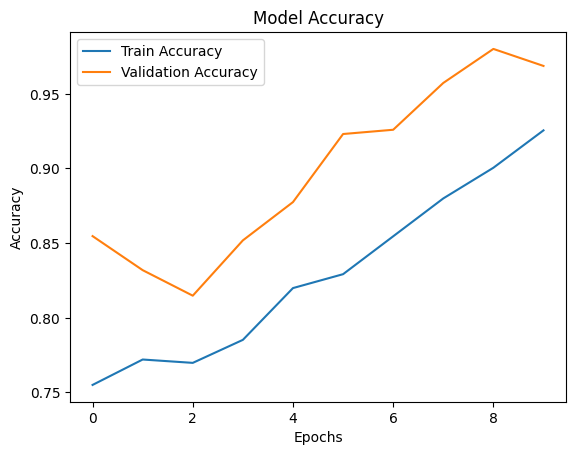

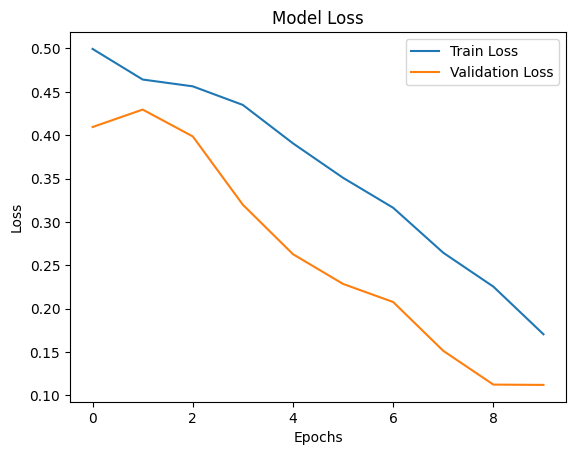

In [65]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()